In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"


In [74]:
data = pd.read_csv('/Users/suryaalavala/Downloads/Instagram-Reach.csv')

In [75]:
data.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [76]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0     2022-04-01
1     2022-04-02
2     2022-04-03
3     2022-04-04
4     2022-04-05
         ...    
360   2023-03-27
361   2023-03-28
362   2023-03-29
363   2023-03-30
364   2023-03-31
Name: Date, Length: 365, dtype: datetime64[ns]

In [77]:
data.columns

Index(['Date', 'Instagram reach'], dtype='object')

In [78]:
data.dtypes

Date               datetime64[ns]
Instagram reach             int64
dtype: object

In [79]:
data.isna()

,Date,Instagram reach
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
360,False,False
361,False,False
362,False,False
363,False,False


In [80]:
#analyzing trend using line chart

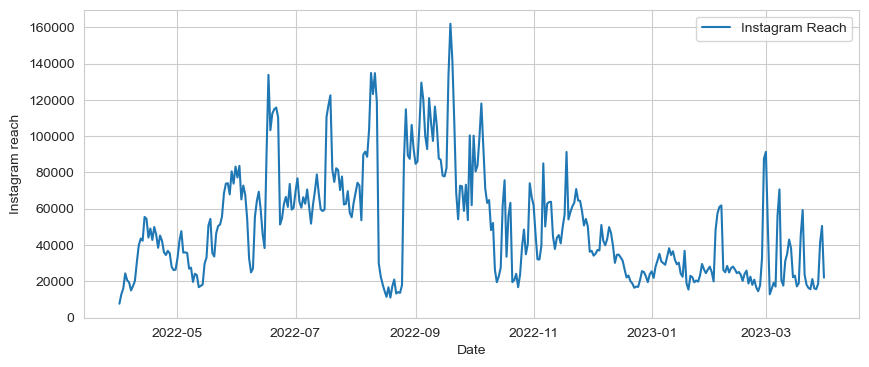

In [81]:
plt.figure(figsize=(10,4))
sns.lineplot(data=data,x='Date',y='Instagram reach', label='Instagram Reach')
plt.show()

In [82]:
#analyzing reach by day of the week

In [83]:
data['Day'] = data['Date'].dt.day_name()
data.head()

,Date,Instagram reach,Day
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday


In [84]:

day_stats = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
day_stats.head()

,Day,mean,median,std
0,Friday,46666.849057,35574.0,29856.943036
1,Monday,52621.692308,46853.0,32296.071347
2,Saturday,47374.750000,40012.0,27667.043634
3,Sunday,53114.173077,47797.0,30906.162384
4,Thursday,48570.923077,39150.0,28623.220625


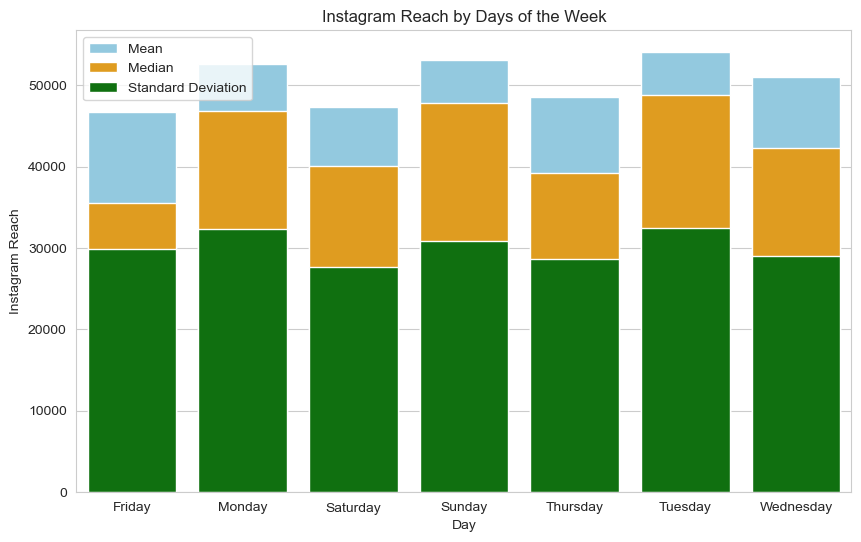

In [85]:
#creating a bar chat to visulaize the days of week
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='mean', data=day_stats, label='Mean', color='skyblue')
sns.barplot(x='Day', y='median', data=day_stats, label='Median', color='orange')
sns.barplot(x='Day', y='std', data=day_stats, label='Standard Deviation', color='green')
plt.xlabel('Day')
plt.ylabel('Instagram Reach')
plt.title('Instagram Reach by Days of the Week')
plt.legend()
plt.show()

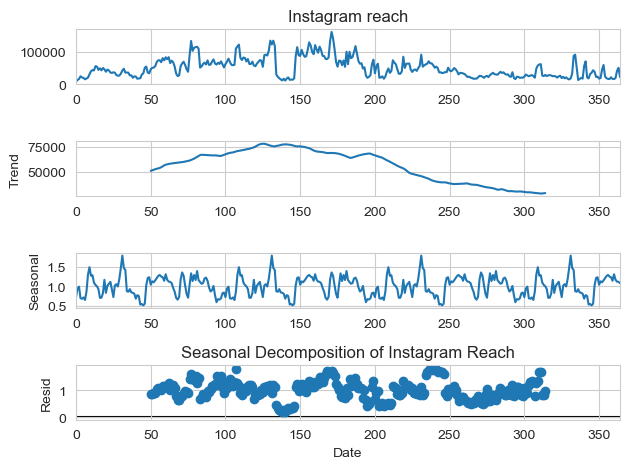

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you already have the data loaded and processed
# data = ...

data = data[["Date", "Instagram reach"]]

result = seasonal_decompose(data['Instagram reach'], model='multiplicative', period=100)

fig = result.plot()

# You can customize the layout and styling using Seaborn
sns.set_style('whitegrid')
plt.title('Seasonal Decomposition of Instagram Reach')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [87]:
#reach is affected by seasonality, so we can use the SARIMA model to forecast the reach of the Instagram reach data

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

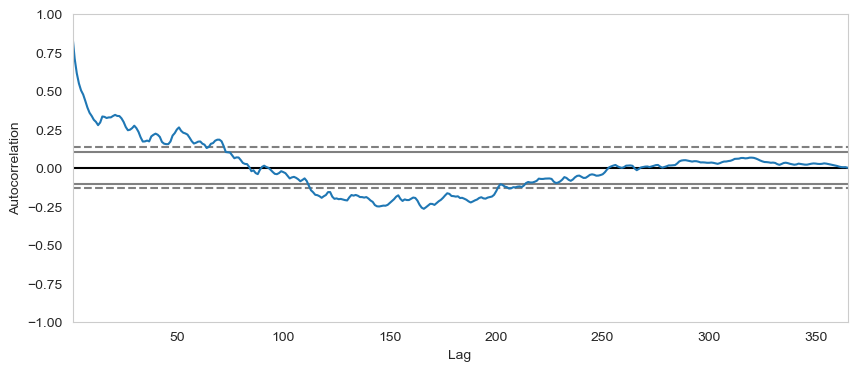

In [88]:
plt.figure(figsize=(10, 4))
pd.plotting.autocorrelation_plot(data['Instagram reach'])

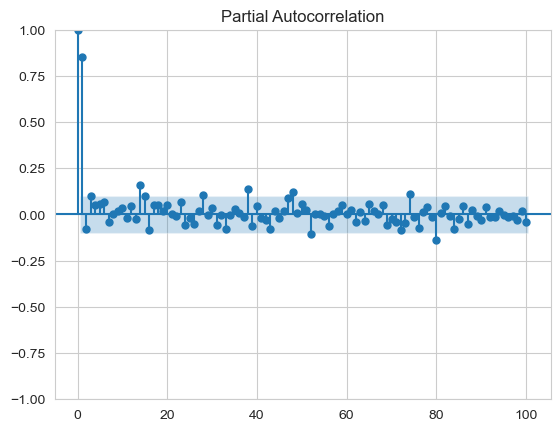

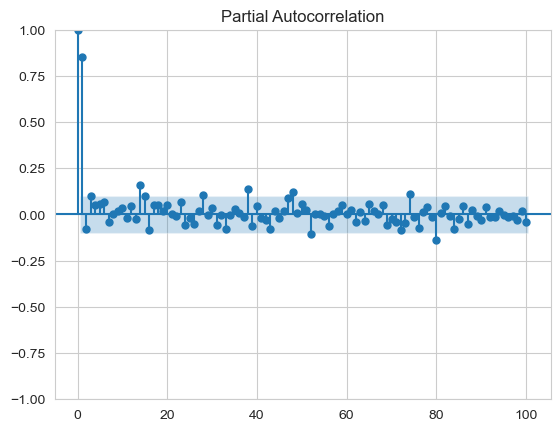

In [90]:

from statsmodels.graphics.tsaplots import plot_pacf

# Setting the method argument to 'ywm' to avoid the FutureWarning
plot_pacf(data["Instagram reach"], lags = 100, method='ywm')

In [ ]:
#using SARMA model 

In [92]:
p, d, q = 8, 1, 2

import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Instagram reach'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08062D+01    |proj g|=  4.51058D-02


 This problem is unconstrained.



At iterate    5    f=  1.07996D+01    |proj g|=  1.64739D-03

At iterate   10    f=  1.07979D+01    |proj g|=  2.14129D-02

At iterate   15    f=  1.07917D+01    |proj g|=  4.15596D-03

At iterate   20    f=  1.07914D+01    |proj g|=  7.37933D-04

At iterate   25    f=  1.07909D+01    |proj g|=  6.72624D-03

At iterate   30    f=  1.07907D+01    |proj g|=  5.04210D-03

At iterate   35    f=  1.07906D+01    |proj g|=  1.58373D-03

At iterate   40    f=  1.07906D+01    |proj g|=  5.61447D-03

At iterate   45    f=  1.07905D+01    |proj g|=  8.80253D-04


/Users/suryaalavala/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




At iterate   50    f=  1.07904D+01    |proj g|=  6.90290D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     55      1     0     0   6.903D-04   1.079D+01
  F =   10.790443408290482     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.512
Date:                            Mon, 31 Jul 2023   AIC                           7919.0

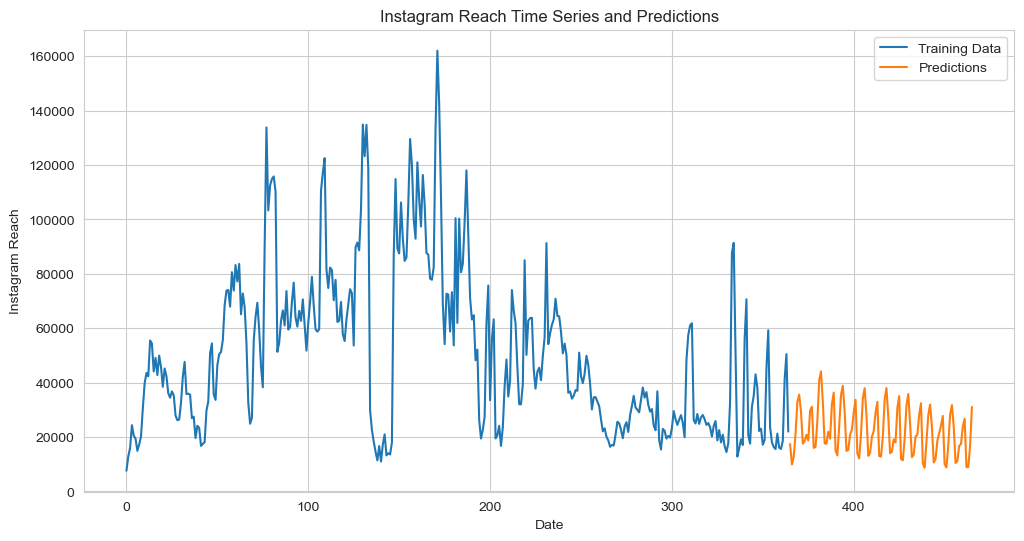

In [98]:
data_x_train = data.index
data_y_train = data["Instagram reach"].values
predictions_x = predictions.index
predictions_y = predictions.values

# Create a new DataFrame for predictions with appropriate index
predictions_df = pd.DataFrame(predictions_y, index=predictions_x, columns=["Predictions"])

# Combine the training data and predictions in a single DataFrame
combined_df = pd.concat([data, predictions_df], axis=1)

#final plotting of the data with training data and predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_df, x=combined_df.index, y="Instagram reach", label="Training Data")
sns.lineplot(data=combined_df, x=combined_df.index, y="Predictions", label="Predictions")
plt.title("Instagram Reach Time Series and Predictions")
plt.xlabel("Date")
plt.ylabel("Instagram Reach")
plt.legend()
plt.show()




